### Monte Carlo - Forecasting Stock Price - MSFT

In [1]:
import numpy as np
import pandas as pd 
from pandas_datareader import data as wb
import matplotlib.pyplot as plt 
from scipy.stats import norm
from datetime import datetime 
%matplotlib inline

In [2]:
from iexfinance.stocks import Stock, get_historical_data

In [3]:
start = datetime(2018, 1, 1)
end = datetime(2023, 3, 23)

api_key = 'API_KEY'

In [4]:
tickers = ['MSFT']
sec_data = pd.DataFrame()
for t in tickers:
    sec_data[t] = get_historical_data(t, start, end, output_format = 'pandas', token=api_key)['close']

In [5]:
sec_data

,MSFT
2018-01-02,85.95
2018-01-03,86.35
2018-01-04,87.11
2018-01-05,88.19
2018-01-08,88.28
...,...
2023-03-17,279.43
2023-03-20,272.23
2023-03-21,273.78
2023-03-22,272.29


In [6]:
log_returns = np.log(sec_data.pct_change()+1)
log_returns

,MSFT
2018-01-02,NaN
2018-01-03,0.004643
2018-01-04,0.008763
2018-01-05,0.012322
2018-01-08,0.001020
...,...
2023-03-17,0.011627
2023-03-20,-0.026105
2023-03-21,0.005678
2023-03-22,-0.005457


<AxesSubplot:>

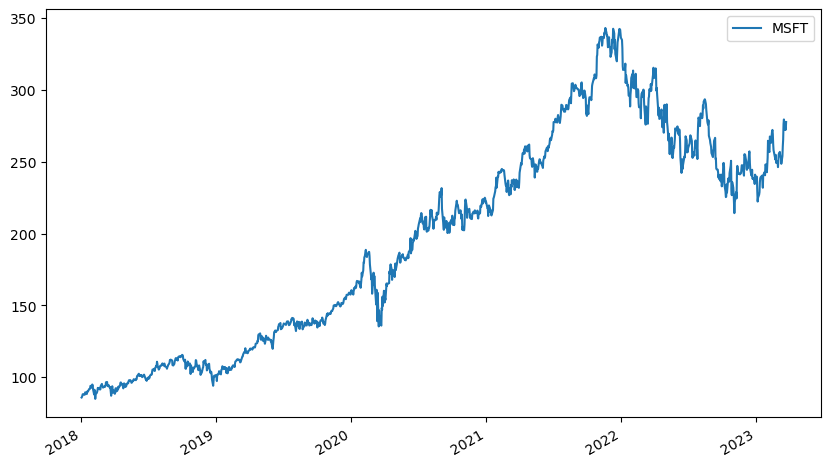

In [7]:
sec_data.plot(figsize=(10,6))

<AxesSubplot:>

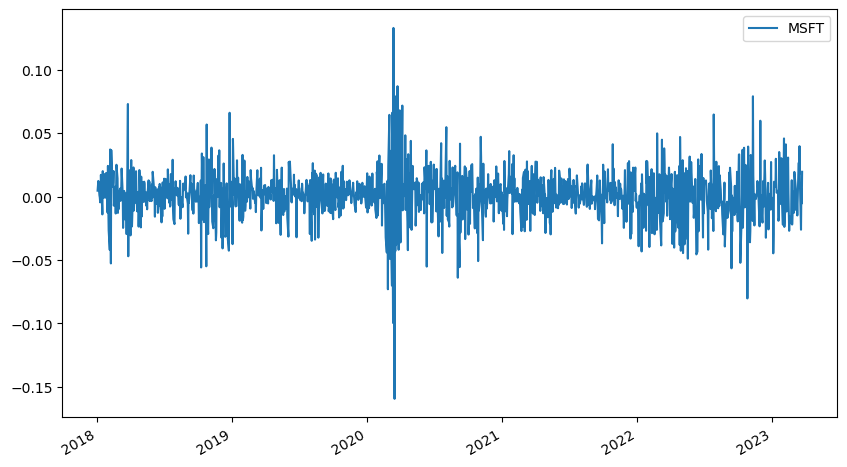

In [8]:
log_returns.plot(figsize=(10,6))

In [9]:
u = log_returns.mean()
u

MSFT    0.000892
dtype: float64

In [10]:
var = log_returns.var()
var

MSFT    0.000383
dtype: float64

In [23]:
drift = (u - 0.5*var)
drift

MSFT    0.000701
dtype: float64

In [12]:
stdev = log_returns.std()
stdev

MSFT    0.019581
dtype: float64

In [13]:
np.array(drift)

array([0.0007007])

In [14]:
drift.values

array([0.0007007])

In [15]:
stdev.values

array([0.01958116])

In [16]:
t_intervals = 1000
iterations = 10

In [17]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals,iterations)))
daily_returns

array([[1.00884327, 1.05070577, 1.0011595 , ..., 0.99577105, 1.01287059,
        1.01624845],
       [0.97369433, 0.99877763, 0.98755609, ..., 0.98658835, 1.03577636,
        0.99657557],
       [0.97371882, 0.9786742 , 1.02874623, ..., 1.01786798, 1.02937238,
        1.0092871 ],
       ...,
       [0.98346186, 0.98419028, 1.00737145, ..., 0.98025792, 0.99388392,
        1.00265066],
       [1.01255178, 1.05183047, 1.01698071, ..., 1.03045276, 1.02414183,
        1.00178235],
       [1.00622367, 1.02559205, 0.98481073, ..., 1.02220156, 1.02475778,
        0.99121323]])

$$
S_t = S_0 \mathbin{\cdot} daily\_return_t
$$
<br />

$$
S_{t+1} = S_t \mathbin{\cdot} daily\_return_{t+1}
$$

<br /> 
$$...$$
<br />  

$$
S_{t+999} = S_{t+998} \mathbin{\cdot} daily\_return_{t+999}
$$



In [18]:
S0 = sec_data.iloc[-1]
S0

MSFT    277.66
Name: 2023-03-23 00:00:00, dtype: object

In [19]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
price_list[0] = S0
price_list

array([[277.66, 277.66, 277.66, ..., 277.66, 277.66, 277.66],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       ...,
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ]])

In [21]:
for t in range(1,t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

price_list

array([[ 277.66      ,  277.66      ,  277.66      , ...,  277.66      ,
         277.66      ,  277.66      ],
       [ 270.35596894,  277.32059588,  274.20482367, ...,  273.93612024,
         287.59366292,  276.70917353],
       [ 263.25069481,  271.40651154,  282.08717927, ...,  278.8308058 ,
         296.04097276,  279.27899895],
       ...,
       [1787.18749408,  468.21608004, 2926.54318411, ..., 1688.14393626,
         723.29184585, 1124.45667405],
       [1809.61987402,  492.48394134, 2976.2379711 , ..., 1739.5525859 ,
         740.75343339, 1126.46085102],
       [1820.88234268,  505.0876157 , 2931.03107591, ..., 1778.1733744 ,
         759.0928463 , 1116.56290309]])

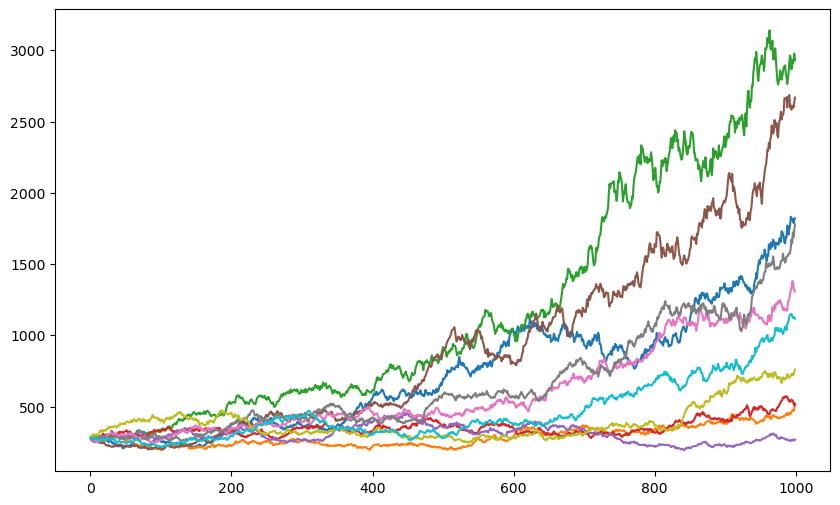

In [22]:
plt.figure(figsize = (10,6))
plt.plot(price_list)